# Loyalty Scheme Analysis

## Table of Contents
1. [Introduction](#1.-Introduction)
2. [Data Loading](#2.-Data-Loading)
3. [Exploratory Data Analysis (EDA)](#3.-Exploratory-Data-Analysis-(EDA)
4. [Hypothesis Testing](#4.-Hypothesis-Testing)
5. [Conclusions](#5.-Conclusions)

---

## 1. Introduction
**Purpose:** The purpose of this notebook is to analyse Echo Circuit's loyalty scheme purchases, focusing on determining whether purchases made with a loyalty memebrship and purchases made without a loyalty memebrship exhibit similar transaction value distributions. Therefore, revealing insights into loyalty members' behaviour.

This analysis is part of my analysis of Echo Circuit's 2019 sales performance. For the complete report please read the [README.md](https://github.com/aranjeetpaul/Echo-Circuit-2019-sales-analysis/blob/main/README.md) from my Github repository.

**Dataset Overview**: This project uses the `cleaned_data.xlsx` dataset which can be found [here](https://github.com/aranjeetpaul/Echo-Circuit-2019-sales-analysis/blob/main/Data/cleaned_data.xlsx). This dataset contains individual order records, including order value, loyalty status, month of order, region of purchase, etc. Original raw data can be found [here](https://github.com/aranjeetpaul/Echo-Circuit-2019-sales-analysis/blob/main/Data/raw_data.xlsx) and SAS/SQL code used to clean it can be found [here](https://github.com/aranjeetpaul/Echo-Circuit-2019-sales-analysis/blob/main/Data%20Cleaning%20%26%20Analysis/Data%20Cleaning.sas).

---

## 2. Data Loading
Load the `cleaned_data.xlsx` dataset. Then create tables required for analysis:
- `loyalty` dataset, containing values of all loyalty purchases.
- `non-loyalty` dataset, containing values of all non-loyalty purchases.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import shapiro, kstest, levene, mannwhitneyu, skew, kurtosis

# Apply preferred Seaborn style
plt.style.use('seaborn-v0_8-darkgrid')

### 2.1 Load Data

Load `cleaned_data.xlsx` dataset.

In [2]:
# Load data
df = pd.read_excel('cleaned_data.xlsx')
# Check all rows and columns are loaded
print(df.shape)
df.head()

(498, 14)


,REGION,DISCOUNT,TRANS_ID,MONTH,VALUE,ITEM_VOL,LOYALTY,REGION_CODE,DELIVERY_DATE,DELIVERY_METHOD,DELIVERY_COST,TOTAL_COST,TAX,LOYALTY_ID
0,Greater London,No Discount,3632,2019-01-01,92.51,12,N,GL,2019-01-01,PAID,1.99,94.50,NaN,9.86
1,North West,No Discount,3646,2019-01-01,18.92,5,N,NW,2019-01-01,PAID,1.99,20.91,NaN,3.16
2,West Midlands,No Discount,3651,2019-01-01,70.95,5,N,WM,2019-01-01,PAID,1.99,72.94,NaN,9.82
3,Scotland,No Discount,3662,2019-01-01,7.54,7,N,SC,2019-01-01,PAID,1.99,9.53,NaN,0.12
4,West Midlands,No Discount,3669,2019-01-01,11.32,2,Y,WM,2019-01-01,FREE,0.00,11.32,22.0,2.26


### 2.2 Create Tables Required For Analysis

Create `loyalty` dataset, containing values of transactions by loyalty members, and `non-loyalty` dataset, containing values of transactions by non-loyalty members.

In [3]:
# Create seperate tables for the value of transactions of loyalty and non-loyalty purchases
loyalty = df[df['LOYALTY'] == 'Y']['VALUE']
non_loyalty = df[df['LOYALTY'] == 'N']['VALUE']

---

## 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) provides an initial understanding of `loyalty` and `non-loyalty` datasets' underlying distributions and patterns.

### 3.1 Initial Analysis

From the below analysis we see that `loyalty` and `non-loyalty` datasets are similar in count, mean, standard deviation, minimum value and quartiles. But different in maximum value, skewness and kurtosis. Suggesting the existence of outliers in the `loyalty` dataset that the `non-loyalty` dataset may not have.

In [4]:
# Gather basic statistics of loyalty purchases
print('Description of loyalty purchases value:')
print(loyalty.describe())
print('skewness:', skew(loyalty))
print('kurtosis:', kurtosis(loyalty), '\n')

# Gather basic statistics of non-loyalty purchases
print('Description of non-loyalty purchases value:')
print(non_loyalty.describe())
print('skewness:', skew(non_loyalty))
print('kurtosis:', kurtosis(non_loyalty))

Description of loyalty purchases value:
count    226.000000
mean      51.191376
std       45.280019
min        0.750000
25%       24.095000
50%       47.335000
75%       73.722500
max      543.640000
Name: VALUE, dtype: float64
skewness: 6.000523663064071
kurtosis: 61.0284197920231 

Description of non-loyalty purchases value:
count    272.000000
mean      45.989118
std       33.082255
min        0.890000
25%       18.892500
50%       41.930000
75%       67.000000
max      234.080000
Name: VALUE, dtype: float64
skewness: 1.8376136210416105
kurtosis: 7.818636242629488


### 3.2 Distribution Visualisation

Below you can see Q-Q plots, boxplots and histograms for both `loyalty` and `non-loyalty` datasets. We can see both are highly skewed and the `loyalty` dataset have outliers with values over £500.

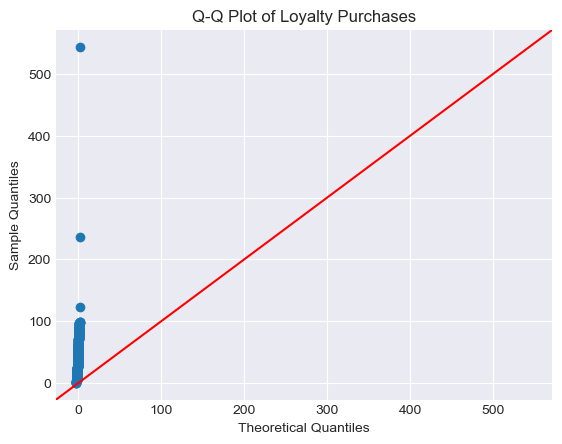

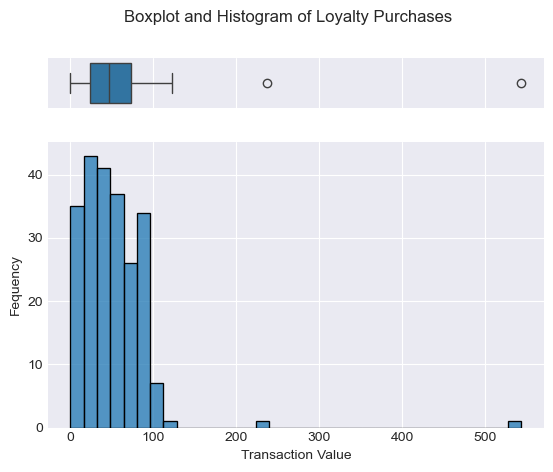

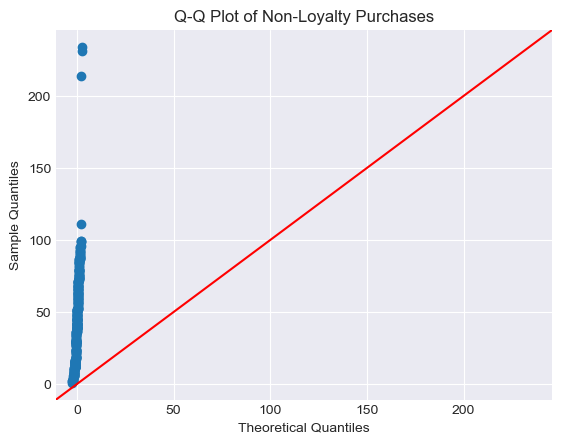

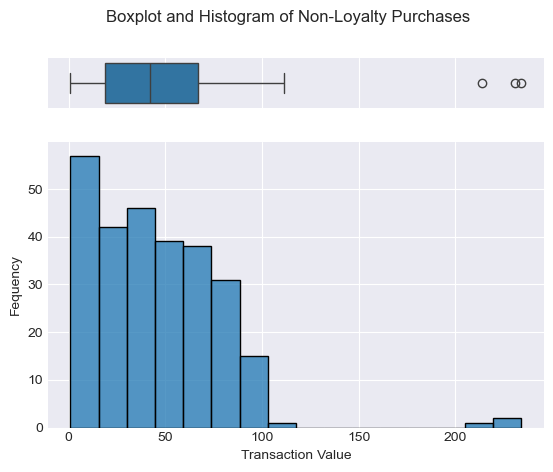

In [5]:
# Create a Q-Q plot of loyalty purchases
sm.qqplot(loyalty, line='45')
plt.title('Q-Q Plot of Loyalty Purchases')
plt.show()
# Create a Boxplot and Histogram of loyalty purchases
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(loyalty, orient="h", ax=ax_box)
sns.histplot(data=loyalty, ax=ax_hist)
ax_box.set(xlabel='')
ax_hist.set(xlabel='Transaction Value', ylabel='Fequency')
plt.suptitle('Boxplot and Histogram of Loyalty Purchases')
plt.show()

# Create a Q-Q plot of non-loyalty purchases
sm.qqplot(non_loyalty, line='45')
plt.title('Q-Q Plot of Non-Loyalty Purchases')
plt.show()
# Create a Boxplot and Histogram of non-loyalty purchases
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(non_loyalty, orient="h", ax=ax_box)
sns.histplot(data=non_loyalty, ax=ax_hist)
ax_box.set(xlabel='')
ax_hist.set(xlabel='Transaction Value', ylabel='Fequency')
plt.suptitle('Boxplot and Histogram of Non-Loyalty Purchases')
plt.show()

### 3.3 Repeat Purchases of Loyalty Members

Below is a table showing the number of repeat purchases of customers with a loyalty membership. We can see most Loyalty members don't carry out repeat purchases.

In [6]:
# Collect Loyalty ID's
loyalty_ids = df[df['LOYALTY'] == 'Y']['LOYALTY_ID']
# Calculate frequency table
freq_tab = pd.DataFrame(loyalty_ids.value_counts().value_counts())
# Rename index and column
freq_tab = freq_tab.rename(columns={'count':'Frequency'})
freq_tab = freq_tab.rename_axis(None, axis=0)
# Rename index to make more sense
freq_tab = freq_tab.rename(index={1:'No repeat purchases', 2:'1 repeat purchases', 3:'2 repeat purchases', 4:'3 repeat purchases'})
# Calculate column containing percentage of loyalty purchases
freq_tab['% of All Loyalty Purchases'] = (freq_tab['Frequency'] / sum(freq_tab['Frequency']))
freq_tab['% of All Loyalty Purchases'] = freq_tab['% of All Loyalty Purchases'].map('{:.1%}'.format)
freq_tab

,Frequency,% of All Loyalty Purchases
No repeat purchases,124,73.4%
1 repeat purchases,36,21.3%
2 repeat purchases,6,3.6%
3 repeat purchases,3,1.8%


---

## 4. Hypothesis Testing

Perform hypothesis tests to compare `loyalty` and `non-loyalty` datasets' distribution.

### 4.1 Shapiro-Wilk Test

Using the Shapiro-Wilk test below we can see that for both the `loyalty` and `non-loyalty` datasets we have sufficient evidence to say neither are normally distributed. This  result is useful for telling us about the datasets and will also be used to determine which hypothsis tests we can use later on.

In [7]:
# Run Shapiro-Wilk test of normality for loyalty and non-loyalty purchases
sha_stat_loy, sha_pval_loy = shapiro(loyalty)
sha_stat_non_loy, sha_pval_non_loy = shapiro(non_loyalty)

# Set significane level to 0.5
alpha = 0.05
# Print conclusions
if sha_pval_loy < alpha:
    print('P-value for loyalty purchases Shapiro-Wilk test:', sha_pval_loy)
    print('So we have sufficient evidence to say that the loyalty dataset does not come from a normal distribution.')
else:
    print('P-value for loyalty purchases Shapiro-Wilk test:', sha_pval_loy)
    print('So we have insufficient evidence to say that the loyalty dataset does not come from a normal distribution.')

if sha_pval_non_loy < alpha:
    print('P-value for non-loyalty purchases Shapiro-Wilk test:', sha_pval_non_loy)
    print('So we have sufficient evidence to say that the non-loyalty dataset does not come from a normal distribution.')
else:
    print('P-value for non-loyalty purchases Shapiro-Wilk test:', sha_pval_non_loy)
    print('So we have insufficient evidence to say that the non-loyalty dataset does not come from a normal distribution.')


P-value for loyalty purchases Shapiro-Wilk test: 4.155410418693349e-22
So we have sufficient evidence to say that the loyalty dataset does not come from a normal distribution.
P-value for non-loyalty purchases Shapiro-Wilk test: 6.994256013636568e-15
So we have sufficient evidence to say that the non-loyalty dataset does not come from a normal distribution.


### 4.2 Levene’s Test

Using the Levene’s test below we can see that we have insufficient evidence to say that the variances of the `loyalty` and `non-loyalty` datasets are significantly different. **Note:** Levene’s test is a parametric test. But with "center" paramter set to "median", Levene’s test can handle non-normal distributions, sometimes referred to as a Brown-Forsythe test (please click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) for documentation).

In [8]:
# Run Levene's test with "center" parameter set to "median" to handle non-normal distributions.
lev_stat, lev_pval = levene(loyalty, non_loyalty, center='median')

# Set significane level to 0.5
alpha = 0.05
# Print conclusions
if lev_pval < alpha:
    print('P-value for Levene\'s test:', lev_pval)
    print('So we have sufficient evidence to say that the variances ofthe loyalty and non-loyalty datasets are significantly different.')
else:
    print('P-value for Levene\'s test:', lev_pval)
    print('So we have insufficient evidence to say that the variances of the loyalty and non-loyalty datasets are significantly different.')

P-value for Levene's test: 0.3450664237056239
So we have insufficient evidence to say that the variances of the loyalty and non-loyalty datasets are significantly different.


### 4.3 Mann-Whitney U Test

Using the Mann-Whitney U test below we can see that we have insufficient evidence to say that the means of the `loyalty` and `non-loyalty` are significantly different.

In [9]:
# Run Mann-Whitney U Test
mann_stat, mann_pval = mannwhitneyu(loyalty, non_loyalty)

# Set significane level to 0.5
alpha = 0.05
# Print conclusions
if mann_pval < alpha:
    print('P-value for Mann-Whitney U test:', mann_pval)
    print('So we have sufficient evidence to say that the means of the loyalty and non-loyalty datasets are significantly different.')
else:
    print('P-value for Mann-Whitney U test:', mann_pval)
    print('So we have insufficient evidence to say that the means of the loyalty and non-loyalty datasets are significantly different.')

P-value for Mann-Whitney U test: 0.13332655523679973
So we have insufficient evidence to say that the means of the loyalty and non-loyalty datasets are significantly different.


---

## 5. Conclusions

From the above analysis, we can draw 2 main conclusions:

- Most loyalty members don't carry out repeat purchases (73%).
- Both loyalty and non-loyalty members exhibit similar behaviours when it comes to amount spent per transaction.

Unfortnately, this suggests Echo Circuits loyalty scheme is a failure in encouraging sales growth.

For a complete report of Echo Circuit's 2019 sale performance, please read the [README.md](https://github.com/aranjeetpaul/Echo-Circuit-2019-sales-analysis/blob/main/README.md) from my Github repository.